Dataset Preview:
   CustomerID  Age  Gender  Tenure  MonthlyCharges  ContractType  \
0           1   45    Male      24            85.5       OneYear   
1           2   30  Female      12            65.0  MonthToMonth   
2           3   50    Male      36           100.0       TwoYear   
3           4   28  Female       6            45.0  MonthToMonth   
4           5   60    Male      48           120.0       TwoYear   

   NumServiceInteractions  NumServices  Churn  
0                       2            3      0  
1                       5            2      1  
2                       1            4      0  
3                       8            1      1  
4                       0            5      0  

Missing Values:
CustomerID                0
Age                       0
Gender                    0
Tenure                    0
MonthlyCharges            0
ContractType              0
NumServiceInteractions    0
NumServices               0
Churn                     0
dtype: int64

Mod

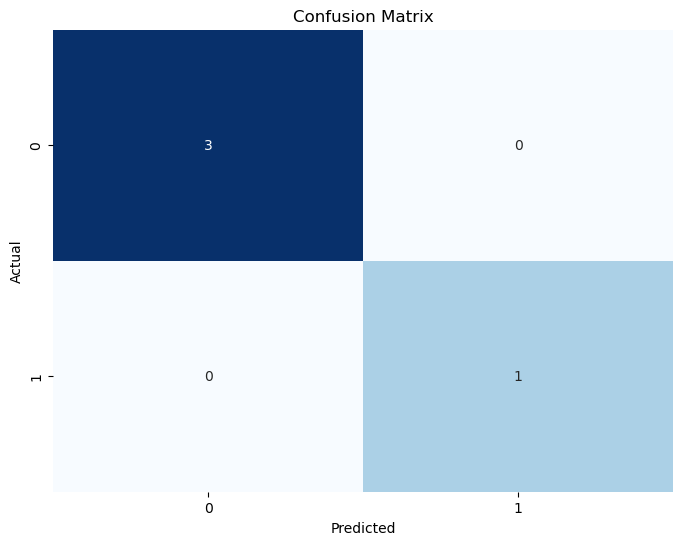

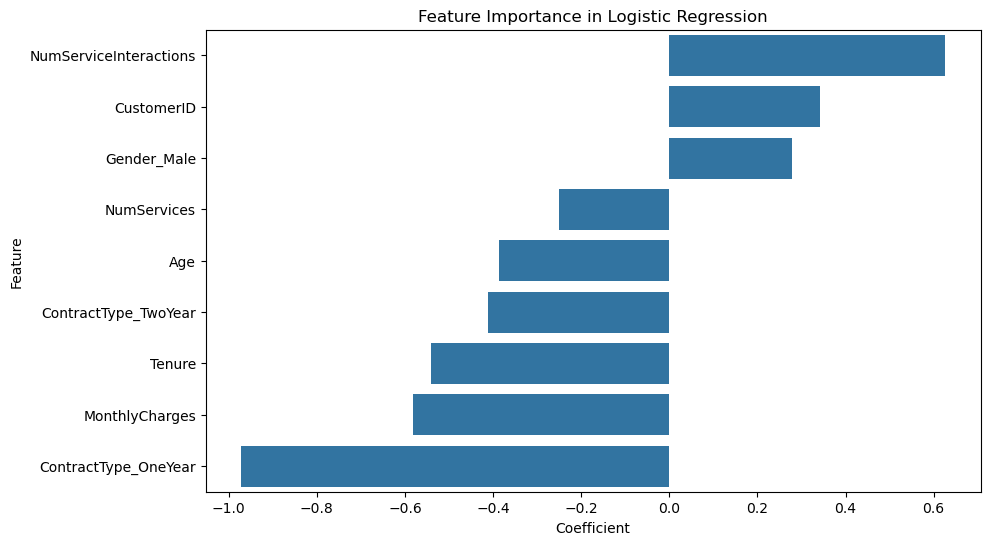


Model saved as 'churn_prediction_model.pkl'


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('customer_churn.csv')
print("Dataset Preview:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
df = df.dropna()
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()
import joblib
joblib.dump(model, 'churn_prediction_model.pkl')
print("\nModel saved as 'churn_prediction_model.pkl'")
